# EDA, FE, Logistic regression on Algerian forest fire prediction dataset

In [ ]:
#Problem statement
#1. Build a model with 90% accuracy if data is not imbalanced.
#2. If data is imbalanced then without handling it find precison, recall, F1-score.
#3. If data is imbalanced then handle it and create a model.

In [5]:
#import require libries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
#Reading the dataset
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [7]:
#shape of the dataset
df.shape

(246, 14)

In [8]:
#Dropping the unwanted rows and columns
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis=1)

In [9]:
#shape of the data after dropping the column
df.shape

(244, 14)

In [10]:
df.tail(124)

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
120  29    09  2012          26  80  16   1.8  47.4  2.9   7.7  0.3     3   
121  30    09  2012          25  78  14   1.4    45  1.9   7.5  0.2   2.4   
122  01    06  2012          32  71  12   0.7  57.1  2.5   8.2  0.6   2.8   
123  02    06  2012          30  73  13     4  55.7  2.7   7.8  0.6   2.9   
124  03    06  2012          29  80  14     2  48.7  2.2   7.6  0.3   2.6   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
120  0.1   not fire     
121  0.1   not fire     
122  0.2   not fire     
123  0.2   not fire     
124  0.1   not fire     
..   ...           ...  
239  6.5       fire     
240    0   not fire     
241  0.2   not fire     
242  0.7   not fire     
243  0.5  not fire      

[124 rows x 14 columns]

In [11]:
#Creating a new column region
df.loc[:122,'region']= 'bejaja'
df.loc[122:, 'region']= 'sidi-bel abbes'

In [12]:
#column of the dataset
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [13]:
#stripping the names of the columns if it has unwanted spaces
df.columns=[i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [14]:
#stripping the data of below features if it has umwanted spaces
for feature in ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    df[feature]=df[feature].str.replace(" ","")


In [15]:
#Checking the unique datapoints of FWI feature
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',
  

Here we got fire in datapoints to remove this, we will replace with mode

In [16]:
df[df['FWI']=='fire'].index

Int64Index([165], dtype='int64')

In [17]:
df['FWI'].mode()

0    0.4
Name: FWI, dtype: object

In [18]:
df.loc[165,'FWI']=0.4

In [19]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


### Here all the features are in categorical datatype

In [20]:
#Checking the null values in the features
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

### 1 null value present in classes feature

In [21]:
#Replacing the null value
df[df['Classes']=='nan'].index

Int64Index([], dtype='int64')

In [22]:
df.loc[165,'Classes']='fire'

In [23]:
df['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [24]:
df['Classes']= df['Classes'].str.replace('notfire','0')
df['Classes']= df['Classes'].str.replace('fire','1')

In [25]:
#replacing the values of region feature with 0 and 1
df['region'].unique()

array(['bejaja', 'sidi-bel abbes'], dtype=object)

In [26]:
df['region']= df['region'].str.replace('bejaja','0')
df['region']= df['region'].str.replace('sidi-bel abbes','1')

#### Converting the datatypes from categorical to numerical


In [27]:

df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['Temperature'] = df['Temperature'].astype(int)
df['RH'] = df['RH'].astype(int)
df['Ws'] = df['Ws'].astype(int)
df['Rain'] = df['Rain'].astype(float)
df['FFMC'] = df['FFMC'].astype(float)
df['DMC'] = df['DMC'].astype(float)
df['DC'] = df['DC'].astype(float)
df['ISI'] = df['ISI'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['FWI'] = df['FWI'].astype(float)
df['Classes'] = df['Classes'].astype(int)
df['region'] = df['region'].astype(int)


In [28]:
#Checking the datatypes of features after converting it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int32  
 14  region       244 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 21.1 KB


 so all the featurs are converted from categorical to numerical

In [29]:
#Creating a copy of dataframe from original dataframe
data=df.copy()
data.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  region  
0  0.5        0       0  
1  0.4        0       0  
2  0.1        0       0  
3  0.0        0       0  
4  0.5        0       0

### Statistical Analysis

In [30]:
data.describe()

day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288484    4.774180   16.664754   
std      1.999406   14.337571   12.368039   47.619393    4.175318   14.204824   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   72.075000    5.800000   13.275000    1.400000    6.000000   
50%      0.000000   83.500000   11.300000   33.100000    3.500000   12.250000   
75%      0.500000   88.300000   20.750000   68.150000    7.300000   22.525000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI     Classes      region  
count  244.000000  244.000000  244.000000  
mean     7.008197    0.565574    0.500000  
std      7.437383    0.496700    0.501028  
min      0.000000    0.000000    0.000000  
25%      0.700000    0.000000    0.000000  
50%      4.200000    1.000000    0.500000  
75%     11.375000    1.000000    1.000000  
max     31.100000    1.000000    1.000000

In [31]:
data.cov()

day         month  year  Temperature          RH  \
day          7.788167e+01  4.641920e-16   0.0     3.071308   -9.747689   
month        4.641920e-16  1.238683e+00   0.0    -0.238683   -0.627572   
year         0.000000e+00  0.000000e+00   0.0     0.000000    0.000000   
Temperature  3.071308e+00 -2.386831e-01   0.0    13.204817  -35.396782   
RH          -9.747689e+00 -6.275720e-01   0.0   -35.396782  221.539415   
Ws           1.165621e+00 -1.296296e-01   0.0    -2.840215    9.874739   
Rain        -1.980908e+00  7.860082e-02   0.0    -2.374270    6.635431   
FFMC         2.834676e+01  2.485597e-01   0.0    35.297598 -137.785533   
DMC          5.365433e+01  9.384774e-01   0.0    21.712423  -74.580245   
DC           2.218594e+02  6.766276e+00   0.0    64.113719 -156.174991   
ISI          6.548769e+00  2.866255e-01   0.0     9.218043  -42.920524   
BUI          6.483903e+01  1.356790e+00   0.0    23.512265  -73.700941   
FWI          2.303207e+01  6.962963e-01   0.0    15.102287  -63.152169   
Classes      8.845038e-01  1.234568e-02   0.0     0.935168   -3.216117   
region       2.924044e-17  0.000000e+00   0.0     0.497942   -3.030864   

                    Ws       Rain        FFMC         DMC           DC  \
day           1.165621  -1.980908   28.346758   53.654328   221.859379   
month        -0.129630   0.078601    0.248560    0.938477     6.766276   
year          0.000000   0.000000    0.000000    0.000000     0.000000   
Temperature  -2.840215  -2.374270   35.297598   21.712423    64.113719   
RH            9.874739   6.635431 -137.785533  -74.580245  -156.174991   
Ws            7.897102   0.956129   -6.577727   -0.043306    10.204060   
Rain          0.956129   3.997623  -15.595918   -7.135415   -28.259196   
FFMC         -6.577727 -15.595918  205.565939  106.820535   344.048788   
DMC          -0.043306  -7.135415  106.820535  152.968382   515.551947   
DC           10.204060 -28.259196  344.048788  515.551947  2267.606583   
ISI           0.178913  -2.897687   44.283138   34.831449    99.199508   
BUI           1.187799  -8.496825  120.090018  172.536341   637.129111   
FWI           0.606139  -4.800293   73.187426   80.480590   262.143165   
Classes      -0.092862  -0.376833    5.484349    3.588791    11.994976   
region       -0.248971  -0.041152    1.613992    1.184156    -1.944053   

                   ISI         BUI         FWI    Classes        region  
day           6.548769   64.839034   23.032065   0.884504  2.924044e-17  
month         0.286626    1.356790    0.696296   0.012346  0.000000e+00  
year          0.000000    0.000000    0.000000   0.000000  0.000000e+00  
Temperature   9.218043   23.512265   15.102287   0.935168  4.979424e-01  
RH          -42.920524  -73.700941  -63.152169  -3.216117 -3.030864e+00  
Ws            0.178913    1.187799    0.606139  -0.092862 -2.489712e-01  
Rain         -2.897687   -8.496825   -4.800293  -0.376833 -4.115226e-02  
FFMC         44.283138  120.090018   73.187426   5.484349  1.613992e+00  
DMC          34.831449  172.536341   80.480590   3.588791  1.184156e+00  
DC           99.199508  637.129111  262.143165  11.994976 -1.944053e+00  
ISI          17.433281   37.714477   28.198196   1.525363  5.615226e-01  
BUI          37.714477  201.777024   90.628767   4.119605  6.218107e-01  
FWI          28.198196   90.628767   55.314665   2.636497  7.181070e-01  
Classes       1.525363    4.119605    2.636497   0.246711  4.115226e-02  
region        0.561523    0.621811    0.718107   0.041152  2.510288e-01

### Checking the distribution of the features

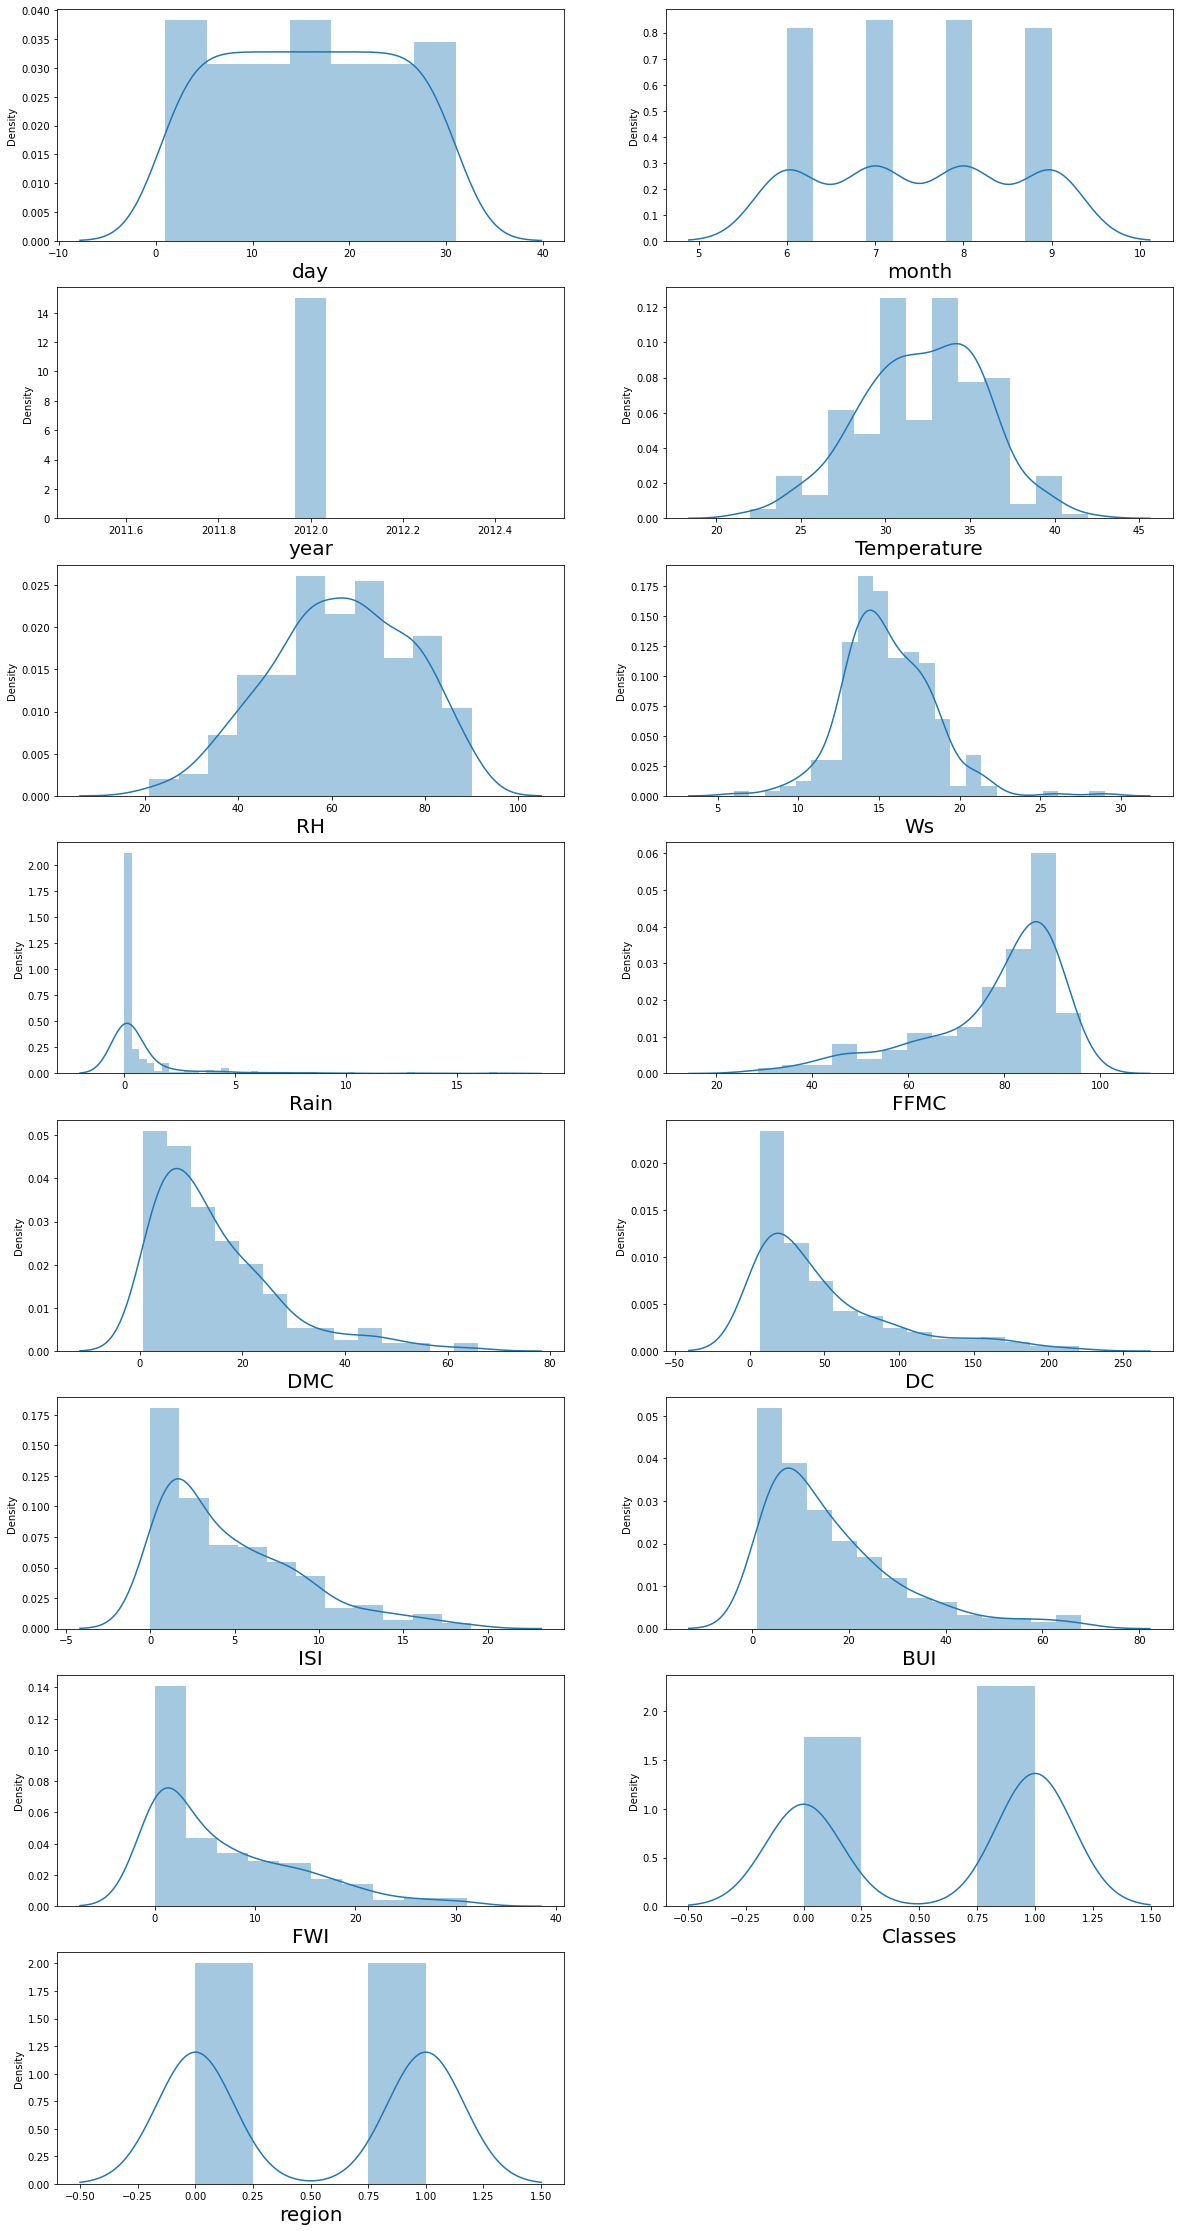

In [32]:
plt.figure(figsize=(20,40), facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=15 :
        ax = plt.subplot(8,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#### Obsevations

Rain, DMC, DC, FWI, ISI, BUI are rightly skewed

There is no varience in the year attribute

### Multivariate Analysis

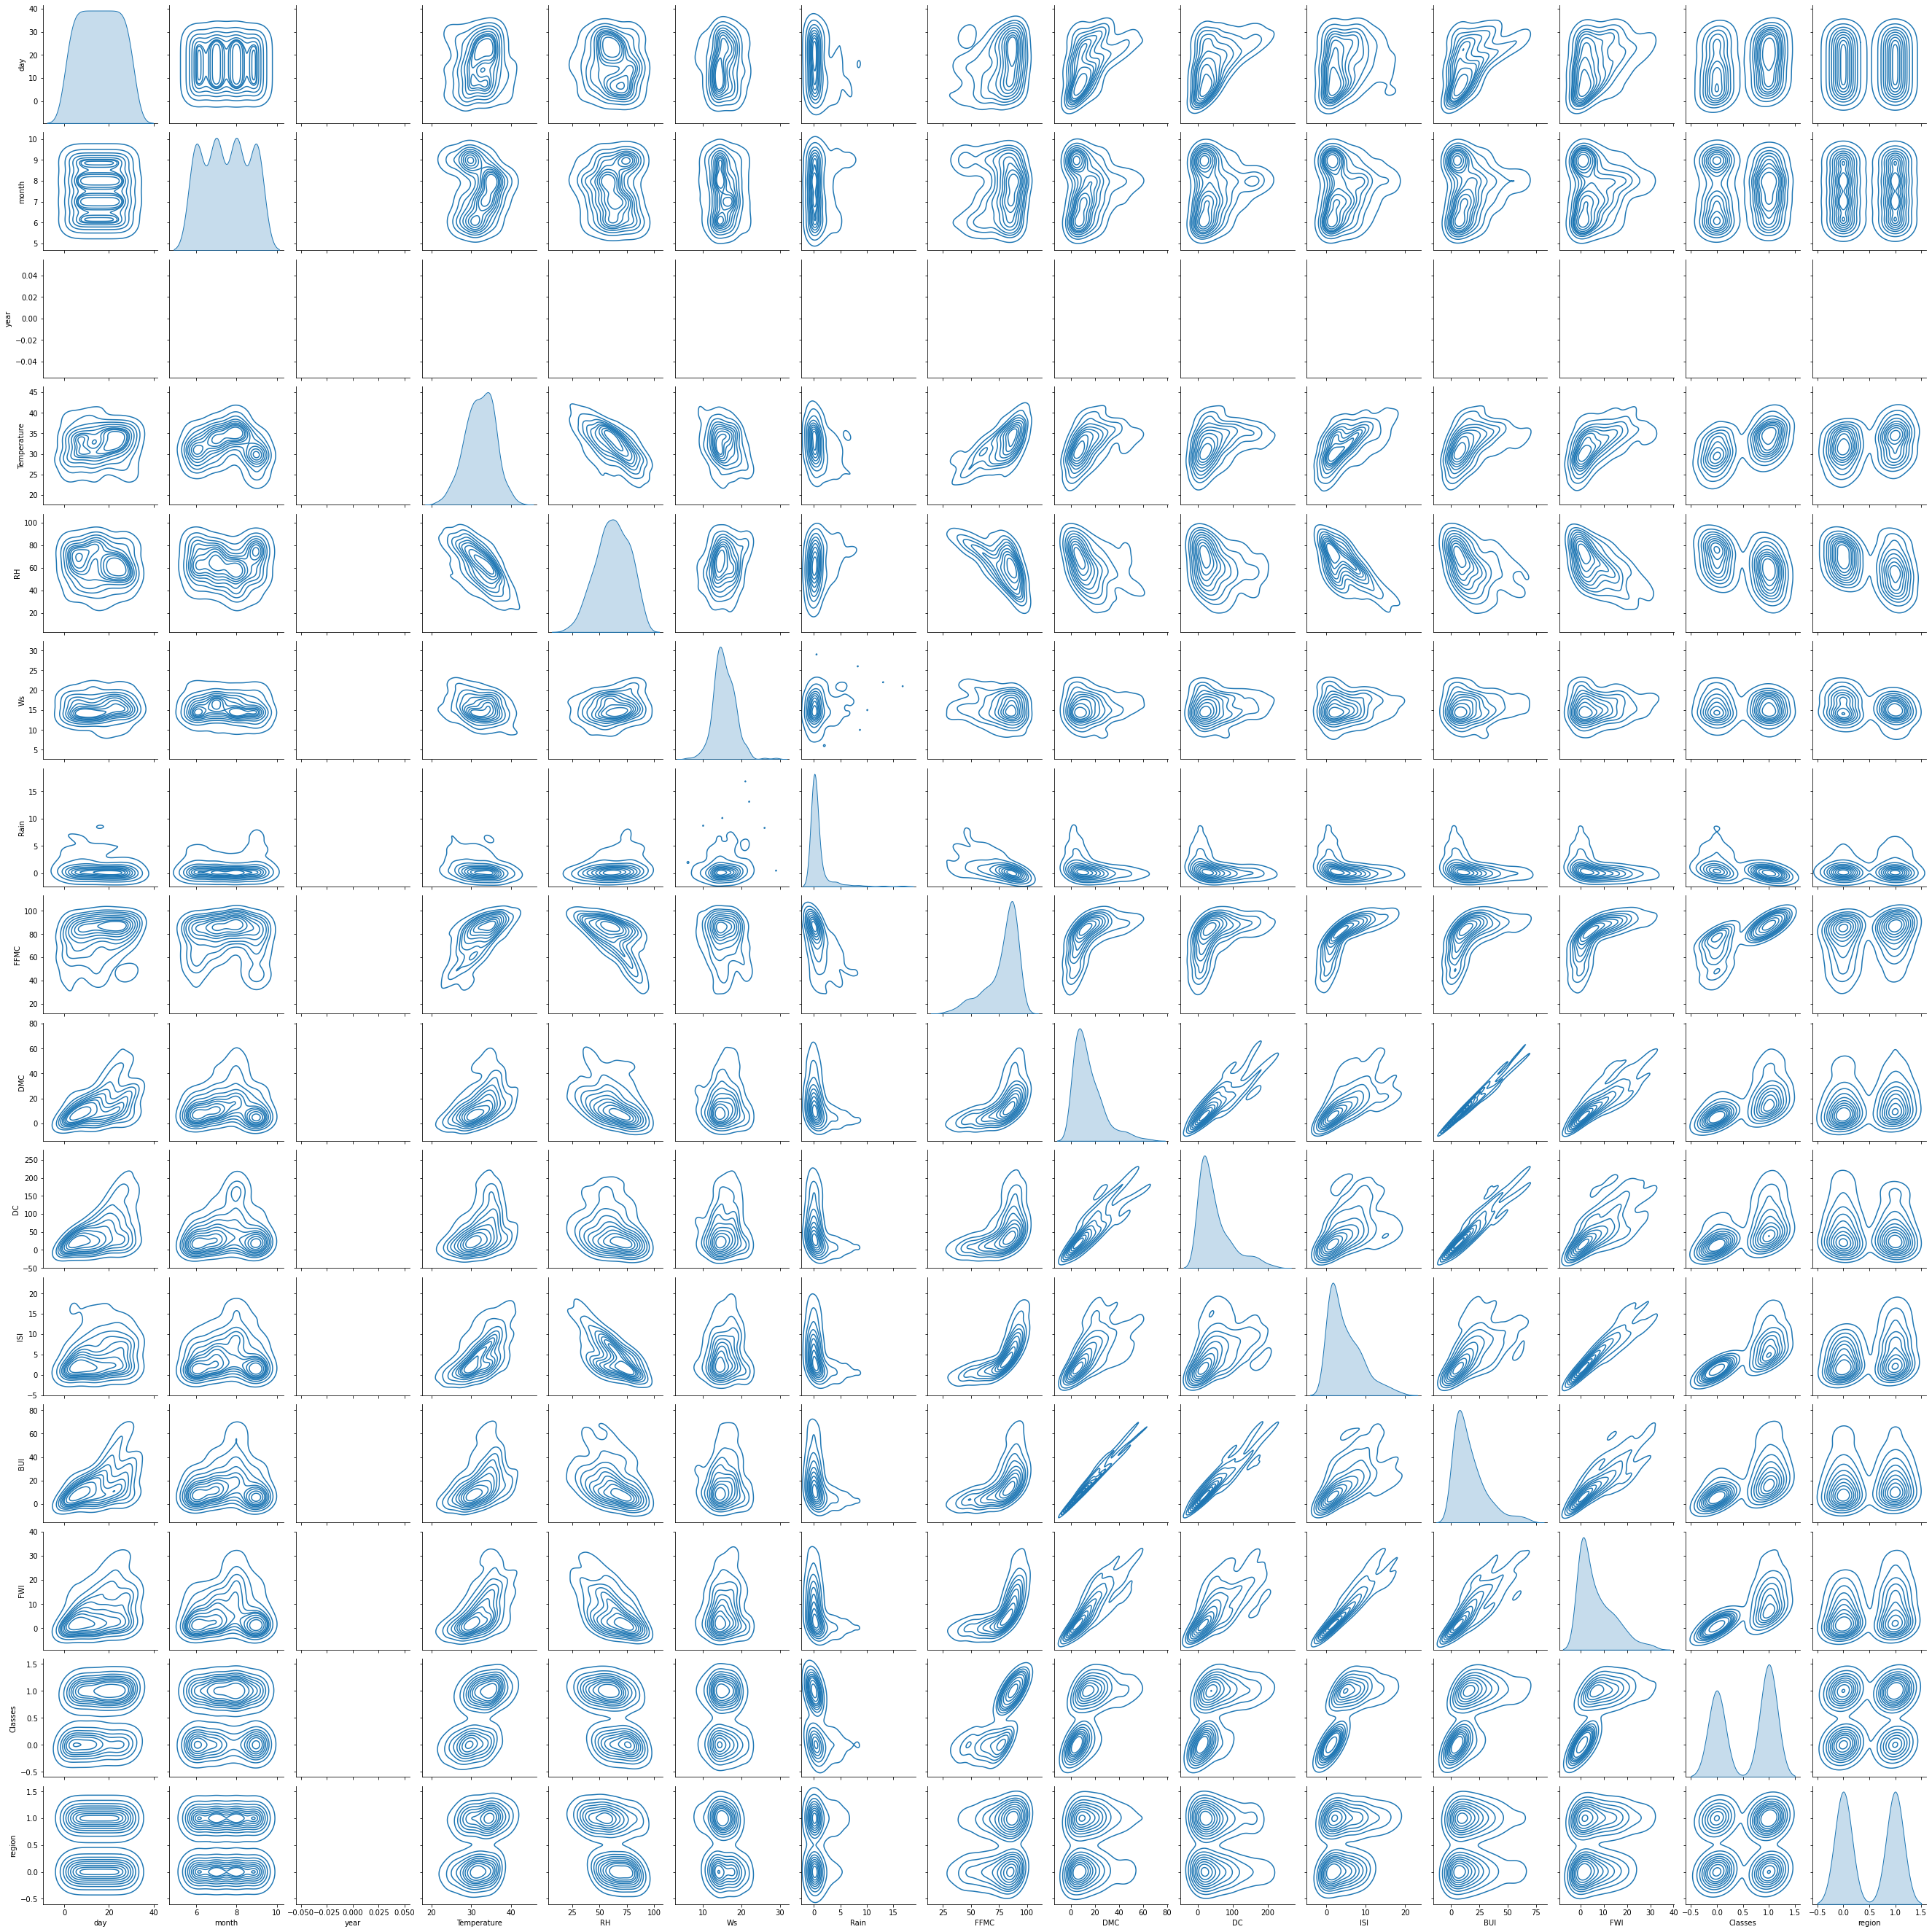

In [33]:
sns.pairplot(data, kind='kde')

<AxesSubplot:>

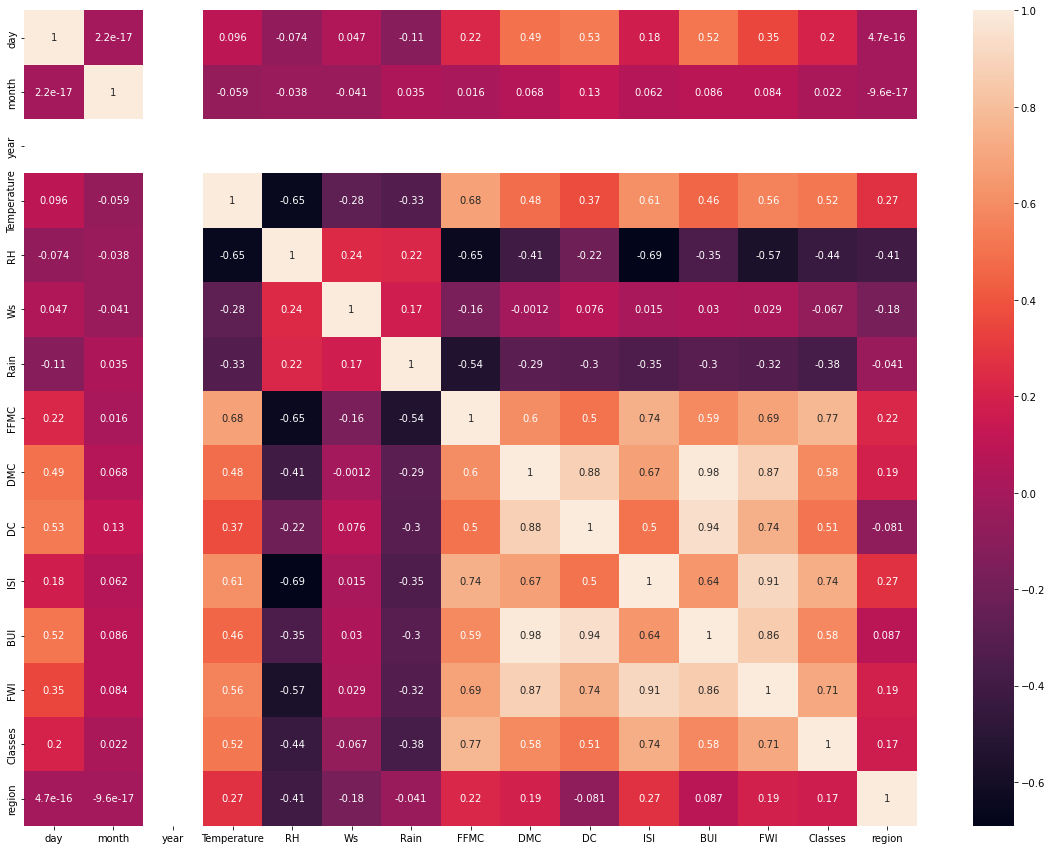

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)

### Visualization of target feature

In [35]:
data.Classes.value_counts()

1    138
0    106
Name: Classes, dtype: int64

<AxesSubplot:xlabel='region', ylabel='Classes'>

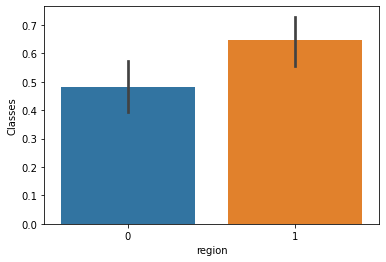

In [36]:
#Lets see in which region most of the fire happened
sns.barplot(x='region', y='Classes', data=data)

<AxesSubplot:xlabel='region', ylabel='Rain'>

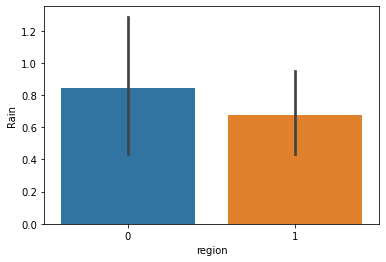

In [37]:
#Lets see in which region most of the rain happened
sns.barplot(x='region', y='Rain', data=data)

<AxesSubplot:xlabel='region', ylabel='Temperature'>

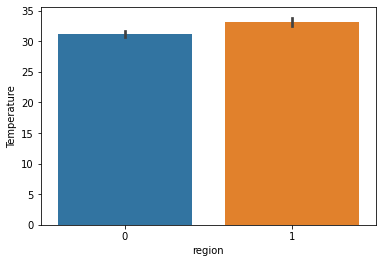

In [38]:
#lets see which region is highly affected by temperature
sns.barplot(x='region', y='Temperature', data=data)

### Box plot to find outliers 

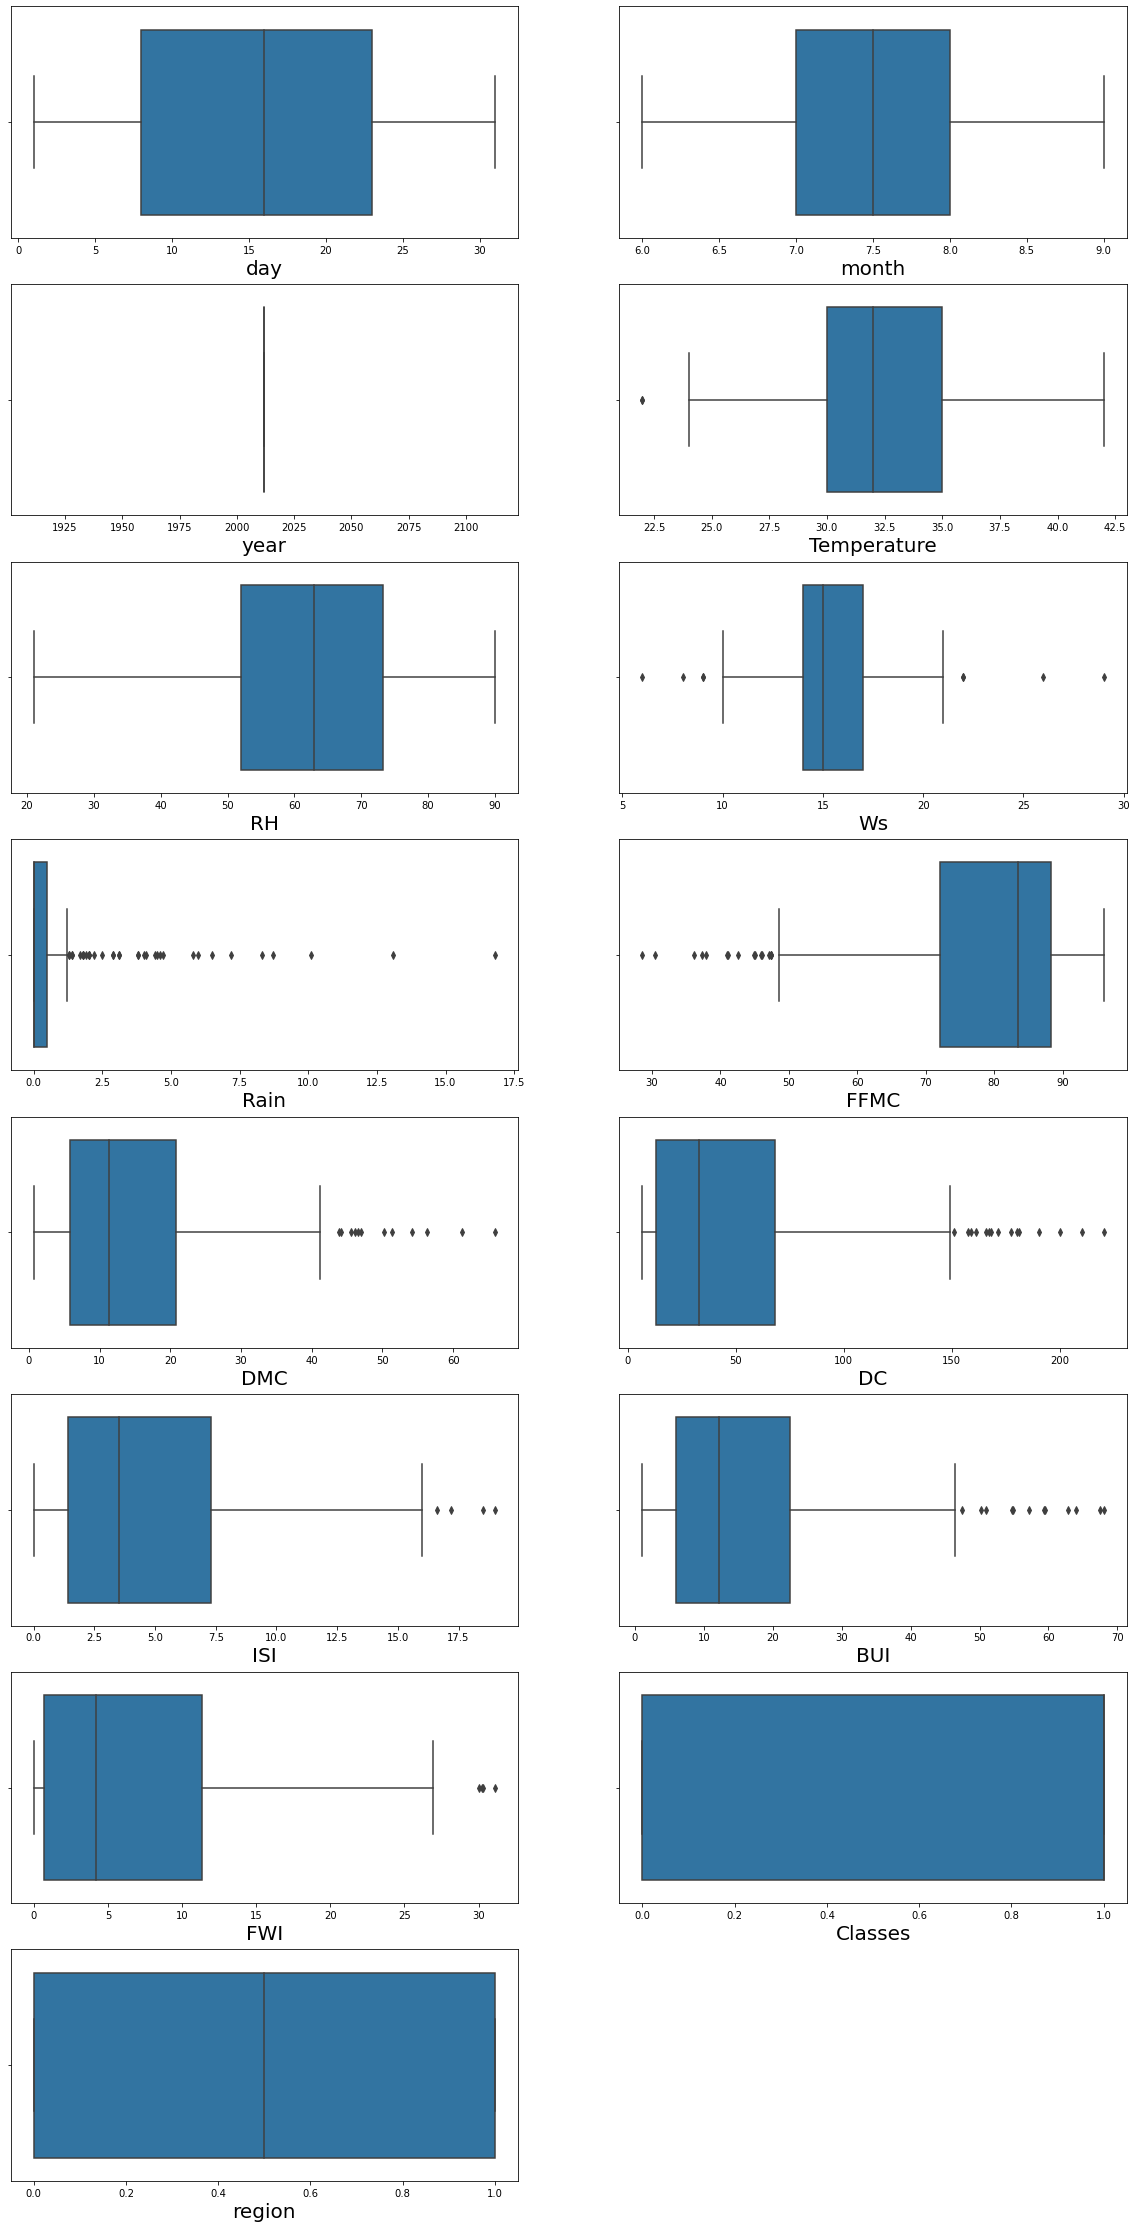

In [39]:
plt.figure(figsize=(20,40), facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=15 :
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

### Observation

WS, Rain, FFMC, DMC, BUI has many outliers

In [40]:
#Dropping the outliers
def outliers_imputation_mild(data,column):
    IQR= data[column].quantile(0.75)-data[column].quantile(0.25)
    lower_fence=data[column].quantile(0.25)-(IQR*1.5)
    upper_fence=data[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower fence {column}:", lower_fence)
    print(f"Upper fence {column}:", upper_fence)
    print("_____________________________________")
    data.loc[data[column]<=lower_fence,column]=lower_fence
    data.loc[data[column]>=upper_fence,column]=upper_fence

In [41]:
columns=data.columns

In [42]:
for col in columns:
    outliers_imputation_mild(data,col)

IQR: 15.0
Lower fence day: -14.5
Upper fence day: 45.5
_____________________________________
IQR: 1.0
Lower fence month: 5.5
Upper fence month: 9.5
_____________________________________
IQR: 0.0
Lower fence year: 2012.0
Upper fence year: 2012.0
_____________________________________
IQR: 5.0
Lower fence Temperature: 22.5
Upper fence Temperature: 42.5
_____________________________________
IQR: 21.25
Lower fence RH: 20.125
Upper fence RH: 105.125
_____________________________________
IQR: 3.0
Lower fence Ws: 9.5
Upper fence Ws: 21.5
_____________________________________
IQR: 0.5
Lower fence Rain: -0.75
Upper fence Rain: 1.25
_____________________________________
IQR: 16.224999999999994
Lower fence FFMC: 47.73750000000001
Upper fence FFMC: 112.63749999999999
_____________________________________
IQR: 14.95
Lower fence DMC: -16.624999999999996
Upper fence DMC: 43.175
_____________________________________
IQR: 54.87500000000001
Lower fence DC: -69.03750000000002
Upper fence DC: 150.462500000

### Rechecking the outliers after dropping it

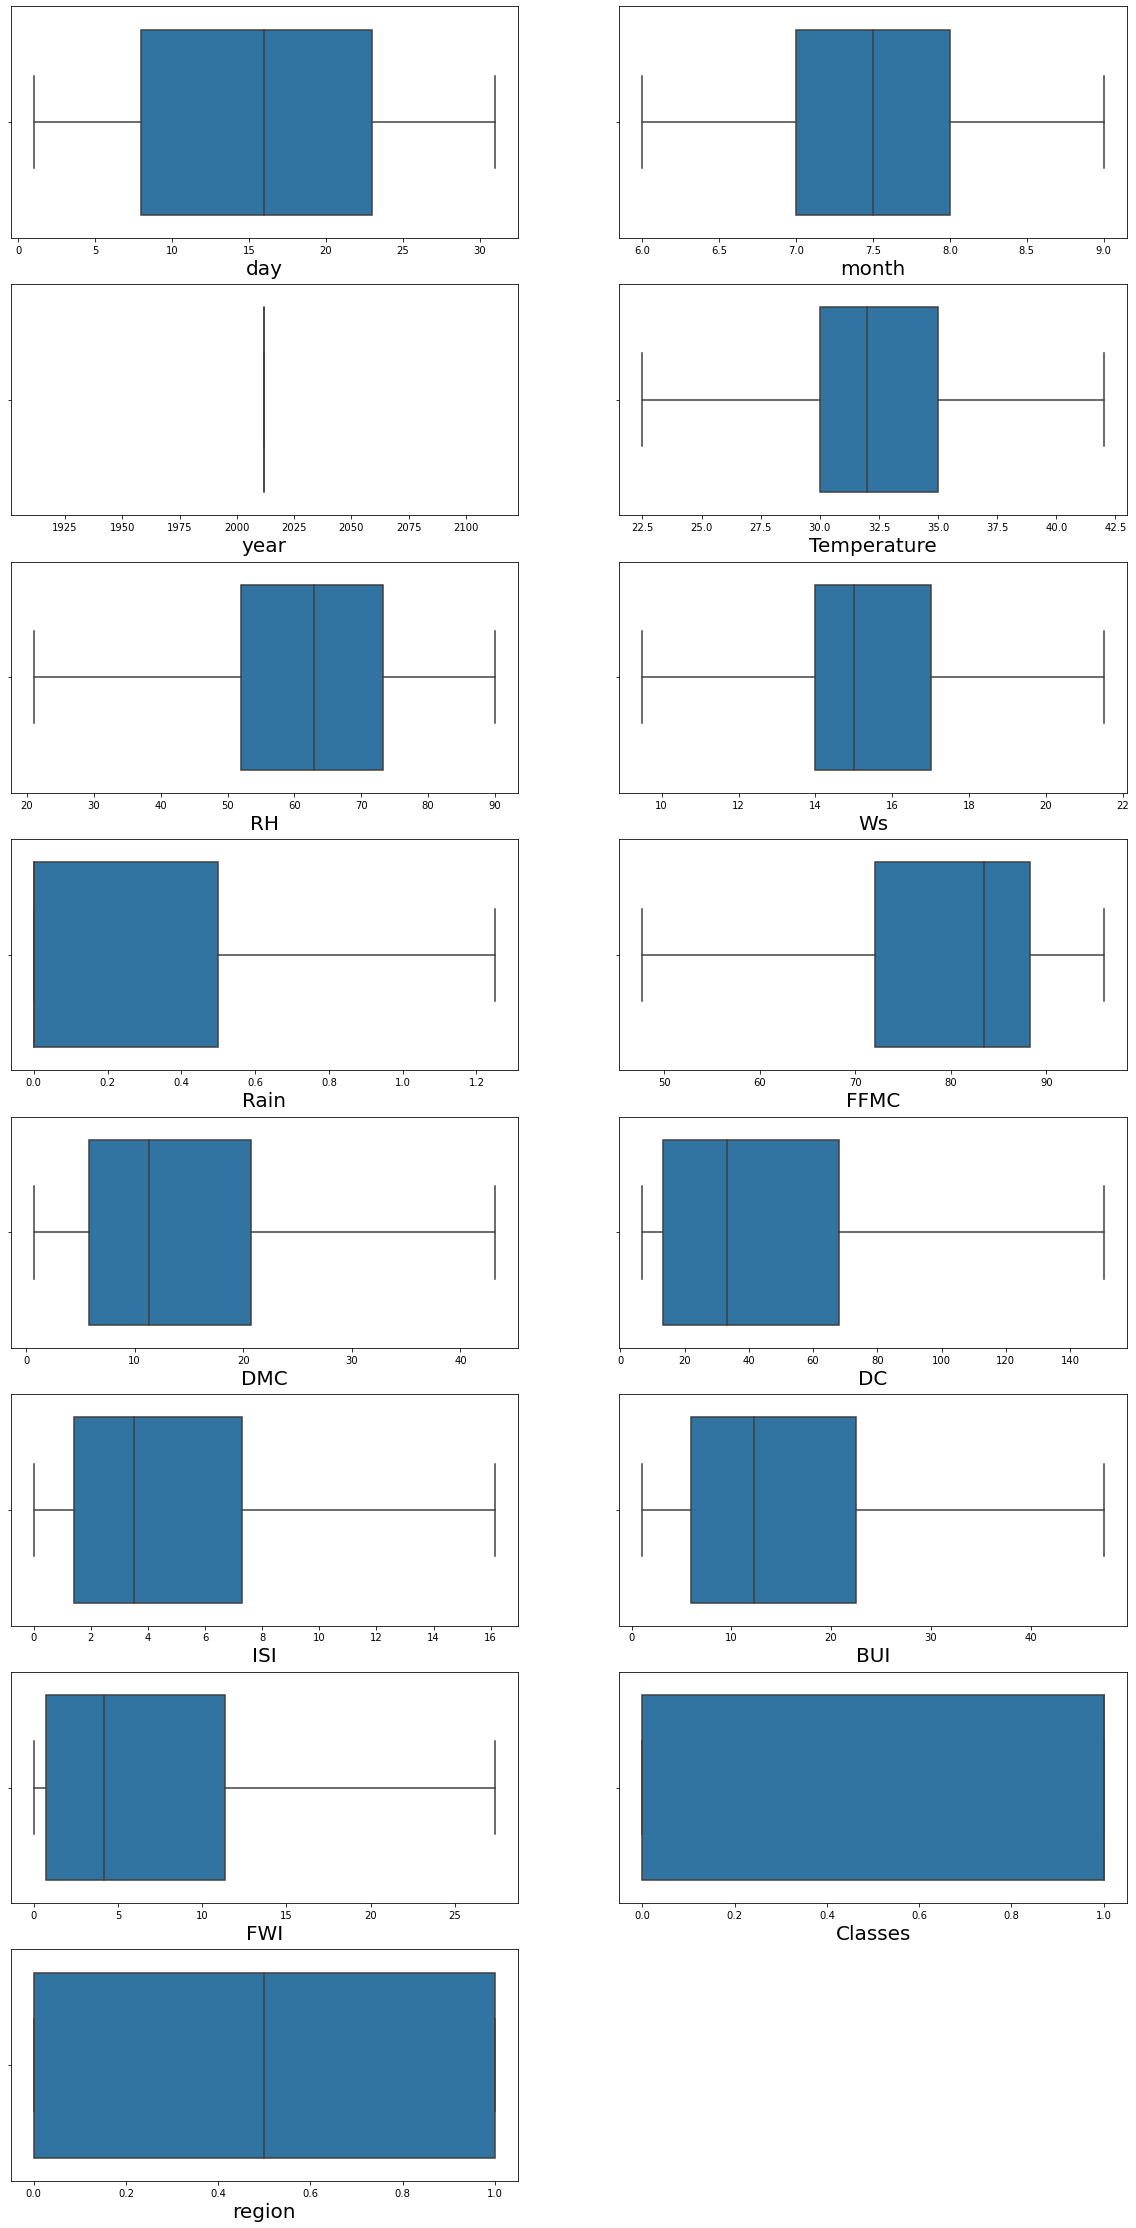

In [43]:
plt.figure(figsize=(20,40), facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=15 :
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#### Observation

outlier is not present in the any of the feature

### Creating dependent and independent features

In [44]:
X = data.drop(columns=['Classes'])
y= data['Classes']

In [45]:
X

day  month  year  Temperature    RH    Ws  Rain     FFMC   DMC    DC  \
0     1.0    6.0  2012         29.0  57.0  18.0  0.00  65.7000   3.4   7.6   
1     2.0    6.0  2012         29.0  61.0  13.0  1.25  64.4000   4.1   7.6   
2     3.0    6.0  2012         26.0  82.0  21.5  1.25  47.7375   2.5   7.1   
3     4.0    6.0  2012         25.0  89.0  13.0  1.25  47.7375   1.3   6.9   
4     5.0    6.0  2012         27.0  77.0  16.0  0.00  64.8000   3.0  14.2   
..    ...    ...   ...          ...   ...   ...   ...      ...   ...   ...   
239  26.0    9.0  2012         30.0  65.0  14.0  0.00  85.4000  16.0  44.5   
240  27.0    9.0  2012         28.0  87.0  15.0  1.25  47.7375   6.5   8.0   
241  28.0    9.0  2012         27.0  87.0  21.5  0.50  47.7375   3.5   7.9   
242  29.0    9.0  2012         24.0  54.0  18.0  0.10  79.7000   4.3  15.2   
243  30.0    9.0  2012         24.0  64.0  15.0  0.20  67.3000   3.8  16.5   

     ISI   BUI  FWI  region  
0    1.3   3.4  0.5     0.0  
1    1.0   3.9  0.4     0.0  
2    0.3   2.7  0.1     0.0  
3    0.0   1.7  0.0     0.0  
4    1.2   3.9  0.5     0.0  
..   ...   ...  ...     ...  
239  4.5  16.9  6.5     1.0  
240  0.1   6.2  0.0     1.0  
241  0.4   3.4  0.2     1.0  
242  1.7   5.1  0.7     1.0  
243  1.2   4.8  0.5     1.0  

[244 rows x 14 columns]

In [46]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
239    1.0
240    0.0
241    0.0
242    0.0
243    0.0
Name: Classes, Length: 244, dtype: float64

## Train test split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Logistic regression model training

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameter = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[1,2,3,4,5,6,10,20,30,40,50]}

In [51]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameter)

## Standardizing or feature selection

In [52]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [53]:
print(classifier_regressor.best_params_)    #best parameter

{'C': 1, 'penalty': 'l2'}


In [54]:
print(classifier_regressor.best_score_)    #best score

0.9725225225225225


### Prediction

In [55]:
y_pred = classifier_regressor.predict(X_test)

In [56]:
y_pred

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1.])

## Accuracy score

In [57]:
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_pred, y_test)
print(score)

0.9508196721311475


### Classification report

In [58]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        25
         1.0       0.95      0.97      0.96        36

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



## Performance metrics

#### 1.Confusion metrics

In [59]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[23,  2],
       [ 1, 35]], dtype=int64)

In [60]:
#TP :- true positive
#TN :- true negative
#FP :- false positive
#FN :- false negative

In [61]:
TP= conf_mat[0][0]
FP= conf_mat[0][1]
FN= conf_mat[1][0]
TN= conf_mat[1][1]

#### Breaking down the formula for accuracy

In [62]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.9508196721311475

#### 2.Precison

In [63]:
precison=TP/(TP+FP)
precison

0.92

#### 3.Recall

In [64]:
recall= TP/(TP+FN)
recall

0.9583333333333334

#### 4.F1-score

In [65]:
F1_score= 2*(recall*precison)/(recall+precison)
F1_score

0.9387755102040817

##### Here our first problem statement model with 90% accuracy with balanced data is completed.

Now we move further towards 2nd problem statement

# Creating imbalanced dataset from the original balanced dataset

In [66]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  region  
0  0.5        0       0  
1  0.4        0       0  
2  0.1        0       0  
3  0.0        0       0  
4  0.5        0       0

In [67]:
df.shape

(244, 15)

In [68]:
#Creating imbalanced dataset
#splitting data into 90:10 ratio using train test split
X1= pd.DataFrame(df, columns = ['day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','region'])
y1= pd.DataFrame(df, columns = ['Classes'])

In [69]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X1,y1, test_size=0.10,random_state=42)

###### checking shape of train and test data

In [70]:
X_train_imb.shape, y_train_imb.shape

((219, 14), (219, 1))

In [71]:
X_test_imb.shape, y_test_imb.shape

((25, 14), (25, 1))

## Replacing all values in y_train as 1 and in y_test as 0 to create imbalance

In [72]:
y_train_imb= y_train_imb.replace(0,1)
y_train_imb.head()

Classes
120        1
10         1
73         1
159        1
156        1

In [73]:
y_test_imb= y_test_imb.replace(1,0)
y_test_imb.head()

Classes
24         0
6          0
153        0
211        0
198        0

In [74]:
#Combining X_train_imb and y_train_imb
train_imb = X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI  \
120   29      9  2012           26  80  16   1.8  47.4   2.9   7.7   0.3   
10    11      6  2012           31  65  14   0.0  84.5  12.5  54.3   4.0   
73    13      8  2012           35  63  15   0.0  87.0  19.0  85.1   5.9   
159    8      7  2012           35  47  18   6.0  80.8   9.8   9.7   3.1   
156    5      7  2012           34  45  18   0.0  90.5  18.7  46.4  11.3   

      BUI   FWI  region  Classes  
120   3.0   0.1       0        1  
10   15.8   5.6       0        1  
73   24.4  10.2       0        1  
159   9.4   3.0       1        1  
156  18.7  15.0       1        1

In [75]:
#Combining X_test_imb and y_test_imb
test_imb = X_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC  ISI  \
24    25      6  2012           31  64  15   0.0  86.7  14.2   63.8  5.7   
6      7      6  2012           33  54  13   0.0  88.2   9.9   30.5  6.4   
153    2      7  2012           33  48  16   0.0  87.6   7.9   17.8  6.8   
211   29      8  2012           35  53  17   0.5  80.2  20.7  149.2  2.7   
198   16      8  2012           40  41  10   0.1  92.0  22.6   65.1  9.5   

      BUI   FWI  region  Classes  
24   18.3   8.4       0        0  
6    10.9   7.2       0        0  
153   7.8   6.4       1        0  
211  30.6   5.9       1        0  
198  24.2  14.8       1        0

In [76]:
#Combining train_imb data and test_imb data
df_imb = pd.concat([train_imb, test_imb], ignore_index=True, sort = False)
df_imb.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
0   29      9  2012           26  80  16   1.8  47.4   2.9   7.7   0.3   3.0   
1   11      6  2012           31  65  14   0.0  84.5  12.5  54.3   4.0  15.8   
2   13      8  2012           35  63  15   0.0  87.0  19.0  85.1   5.9  24.4   
3    8      7  2012           35  47  18   6.0  80.8   9.8   9.7   3.1   9.4   
4    5      7  2012           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   

    FWI  region  Classes  
0   0.1       0        1  
1   5.6       0        1  
2  10.2       0        1  
3   3.0       1        1  
4  15.0       1        1

In [77]:
df_imb.shape

(244, 15)

###### Here our imbalanced data is ready

In [78]:
#Checking the imbalancing
df_imb.Classes.value_counts()

1    219
0     25
Name: Classes, dtype: int64

### Now we are performing Logistic regression on imbalanced data

In [79]:
df_imb.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
0   29      9  2012           26  80  16   1.8  47.4   2.9   7.7   0.3   3.0   
1   11      6  2012           31  65  14   0.0  84.5  12.5  54.3   4.0  15.8   
2   13      8  2012           35  63  15   0.0  87.0  19.0  85.1   5.9  24.4   
3    8      7  2012           35  47  18   6.0  80.8   9.8   9.7   3.1   9.4   
4    5      7  2012           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   

    FWI  region  Classes  
0   0.1       0        1  
1   5.6       0        1  
2  10.2       0        1  
3   3.0       1        1  
4  15.0       1        1

In [80]:
#Separating dependent and independent features
X1= df_imb.drop(columns= ['Classes'])
y1= df_imb['Classes']

In [81]:
X1

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI  \
0     29      9  2012           26  80  16   1.8  47.4   2.9   7.7   0.3   
1     11      6  2012           31  65  14   0.0  84.5  12.5  54.3   4.0   
2     13      8  2012           35  63  15   0.0  87.0  19.0  85.1   5.9   
3      8      7  2012           35  47  18   6.0  80.8   9.8   9.7   3.1   
4      5      7  2012           34  45  18   0.0  90.5  18.7  46.4  11.3   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...   ...   
239    4      7  2012           33  78  17   0.0  80.1   4.6  18.5   2.7   
240   20      6  2012           30  80  16   0.4  59.8   3.4  27.1   0.9   
241   18      9  2012           32  49  11   0.0  89.4   9.8  33.1   6.8   
242    1      7  2012           29  68  19   1.0  59.9   2.5   8.6   1.1   
243    4      8  2012           38  35  15   0.0  93.8  23.0  42.7  15.7   

      BUI   FWI  region  
0     3.0   0.1       0  
1    15.8   5.6       0  
2    24.4  10.2       0  
3     9.4   3.0       1  
4    18.7  15.0       1  
..    ...   ...     ...  
239   5.7   1.7       0  
240   5.1   0.4       0  
241  11.3   7.7       0  
242   2.9   0.4       0  
243  22.9  20.9       1  

[244 rows x 14 columns]

In [82]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int32

In [83]:
from sklearn.preprocessing import StandardScaler 

In [84]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X1)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.25, random_state=355)

In [86]:
log_reg=LogisticRegression()

In [87]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [88]:
y_pred = log_reg.predict(X_test)

##### 1. Confusion metrics

In [89]:
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[ 0,  0],
       [ 5, 56]], dtype=int64)

In [90]:
TP= conf_mat[0][0]
FP= conf_mat[0][1]
FN= conf_mat[1][0]
TN= conf_mat[1][1]

##### 2.Precison

In [91]:
precison=TP/(TP+FP)
precison

nan

##### 3.Recall

In [92]:
recall= TP/(TP+FN)
recall

0.0

##### 4.F1-score

In [93]:
F1_score= 2*(recall*precison)/(recall+precison)
F1_score

nan

###### Here we complete with our 2nd problem statement

## observation

#### Logistic regression does not support imbalanced classification directly

## Now we are moving towords our 3rd problem statement

# Handling imbalanced data and creating a model

In [97]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
from imblearn.combine import SMOTETomek

In [3]:
smk=SMOTETomek()
smk

SMOTETomek()

In [94]:
X_bal,y_bal= smk.fit_resample(X1,y1)

In [95]:
X_bal.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
0   29      9  2012           26  80  16   1.8  47.4   2.9   7.7   0.3   3.0   
1   13      8  2012           35  63  15   0.0  87.0  19.0  85.1   5.9  24.4   
2    8      7  2012           35  47  18   6.0  80.8   9.8   9.7   3.1   9.4   
3    5      7  2012           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
4   21      9  2012           31  55  11   0.0  87.8  16.5  57.9   5.4  19.2   

    FWI  region  
0   0.1       0  
1  10.2       0  
2   3.0       1  
3  15.0       1  
4   8.3       0

In [96]:
y_bal.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int32

In [97]:
X_bal.shape, y_bal.shape

((422, 14), (422,))

In [100]:
#Creating balanced data from imbalanced data
data_bal = X_bal.join(pd.DataFrame(y_bal))
data_bal.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
0   29      9  2012           26  80  16   1.8  47.4   2.9   7.7   0.3   3.0   
1   13      8  2012           35  63  15   0.0  87.0  19.0  85.1   5.9  24.4   
2    8      7  2012           35  47  18   6.0  80.8   9.8   9.7   3.1   9.4   
3    5      7  2012           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
4   21      9  2012           31  55  11   0.0  87.8  16.5  57.9   5.4  19.2   

    FWI  region  Classes  
0   0.1       0        1  
1  10.2       0        1  
2   3.0       1        1  
3  15.0       1        1  
4   8.3       0        1

In [102]:
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          422 non-null    int32  
 1   month        422 non-null    int32  
 2   year         422 non-null    int32  
 3   Temperature  422 non-null    int32  
 4   RH           422 non-null    int32  
 5   Ws           422 non-null    int32  
 6   Rain         422 non-null    float64
 7   FFMC         422 non-null    float64
 8   DMC          422 non-null    float64
 9   DC           422 non-null    float64
 10  ISI          422 non-null    float64
 11  BUI          422 non-null    float64
 12  FWI          422 non-null    float64
 13  region       422 non-null    int32  
 14  Classes      422 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 36.4 KB


## Statistical Analysis on balanced dataset 

In [103]:
data_bal.describe()

day       month    year  Temperature          RH          Ws  \
count  422.000000  422.000000   422.0   422.000000  422.000000  422.000000   
mean    15.116114    7.215640  2012.0    32.281991   61.962085   14.746445   
std      8.629523    1.053641     0.0     3.358770   14.016905    2.861768   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      7.000000    6.000000  2012.0    30.000000   52.250000   13.000000   
50%     15.000000    7.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   75.000000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  422.000000  422.000000  422.000000  422.000000  422.000000  422.000000   
mean     0.589314   78.131883   13.155090   44.233592    4.527606   14.932033   
std      1.568914   12.980471   10.738051   42.229479    3.891765   12.375685   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   72.625187    5.850000   16.306147    1.388158    6.243576   
50%      0.039978   82.350000   10.128265   28.206813    3.439902   11.104548   
75%      0.500000   87.929004   17.875000   58.875000    6.800000   21.019634   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI      region     Classes  
count  422.000000  422.000000  422.000000  
mean     6.279142    0.393365    0.500000  
std      6.808773    0.489076    0.500593  
min      0.000000    0.000000    0.000000  
25%      0.787470    0.000000    0.000000  
50%      4.026596    0.000000    0.500000  
75%      9.575000    1.000000    1.000000  
max     31.100000    1.000000    1.000000

In [104]:
data_bal.corr()

day     month  year  Temperature        RH        Ws  \
day          1.000000  0.087367   NaN     0.196122 -0.158161 -0.094026   
month        0.087367  1.000000   NaN     0.070031 -0.166711 -0.003093   
year              NaN       NaN   NaN          NaN       NaN       NaN   
Temperature  0.196122  0.070031   NaN     1.000000 -0.671350 -0.343203   
RH          -0.158161 -0.166711   NaN    -0.671350  1.000000  0.248818   
Ws          -0.094026 -0.003093   NaN    -0.343203  0.248818  1.000000   
Rain        -0.105187  0.062637   NaN    -0.279587  0.227092  0.162449   
FFMC         0.268215  0.083297   NaN     0.651963 -0.676231 -0.188424   
DMC          0.473580  0.194494   NaN     0.515130 -0.465234  0.010220   
DC           0.492176  0.221427   NaN     0.353192 -0.262321  0.123220   
ISI          0.147148  0.168292   NaN     0.603409 -0.730797 -0.002748   
BUI          0.494942  0.205724   NaN     0.471542 -0.401757  0.052582   
FWI          0.293945  0.208039   NaN     0.568236 -0.626850  0.036865   
region       0.084828  0.116175   NaN     0.396471 -0.447908 -0.132221   
Classes      0.093750  0.331000   NaN    -0.055802 -0.030805  0.322491   

                 Rain      FFMC       DMC        DC       ISI       BUI  \
day         -0.105187  0.268215  0.473580  0.492176  0.147148  0.494942   
month        0.062637  0.083297  0.194494  0.221427  0.168292  0.205724   
year              NaN       NaN       NaN       NaN       NaN       NaN   
Temperature -0.279587  0.651963  0.515130  0.353192  0.603409  0.471542   
RH           0.227092 -0.676231 -0.465234 -0.262321 -0.730797 -0.401757   
Ws           0.162449 -0.188424  0.010220  0.123220 -0.002748  0.052582   
Rain         1.000000 -0.546112 -0.267824 -0.265414 -0.329912 -0.274621   
FFMC        -0.546112  1.000000  0.615513  0.479221  0.758605  0.588748   
DMC         -0.267824  0.615513  1.000000  0.866222  0.702022  0.981321   
DC          -0.265414  0.479221  0.866222  1.000000  0.497180  0.938941   
ISI         -0.329912  0.758605  0.702022  0.497180  1.000000  0.650889   
BUI         -0.274621  0.588748  0.981321  0.938941  0.650889  1.000000   
FWI         -0.296844  0.696688  0.878854  0.719943  0.925698  0.851471   
region      -0.007549  0.268878  0.281535 -0.003175  0.337203  0.178904   
Classes      0.155618 -0.000120  0.190220  0.157430  0.084584  0.186660   

                  FWI    region   Classes  
day          0.293945  0.084828  0.093750  
month        0.208039  0.116175  0.331000  
year              NaN       NaN       NaN  
Temperature  0.568236  0.396471 -0.055802  
RH          -0.626850 -0.447908 -0.030805  
Ws           0.036865 -0.132221  0.322491  
Rain        -0.296844 -0.007549  0.155618  
FFMC         0.696688  0.268878 -0.000120  
DMC          0.878854  0.281535  0.190220  
DC           0.719943 -0.003175  0.157430  
ISI          0.925698  0.337203  0.084584  
BUI          0.851471  0.178904  0.186660  
FWI          1.000000  0.281589  0.139588  
region       0.281589  1.000000  0.252249  
Classes      0.139588  0.252249  1.000000

In [105]:
data_bal.cov()

day     month  year  Temperature          RH         Ws  \
day           74.468671  0.794379   0.0     5.684519  -19.130979  -2.322033   
month          0.794379  1.110159   0.0     0.247836   -2.462113  -0.009327   
year           0.000000  0.000000   0.0     0.000000    0.000000   0.000000   
Temperature    5.684519  0.247836   0.0    11.281338  -31.606860  -3.298877   
RH           -19.130979 -2.462113   0.0   -31.606860  196.473618   9.980863   
Ws            -2.322033 -0.009327   0.0    -3.298877    9.980863   8.189714   
Rain          -1.424122  0.103543   0.0    -1.473315    4.994046   0.729375   
FFMC          30.044231  1.139234   0.0    28.424537 -123.037509  -6.999403   
DMC           43.883958  2.200515   0.0    18.579016  -70.024347   0.314059   
DC           179.358811  9.852317   0.0    50.096442 -155.274858  14.891206   
ISI            4.941813  0.690085   0.0     7.887486  -39.865338  -0.030607   
BUI           52.857949  2.682538   0.0    19.600631  -69.692294   1.862278   
FWI           17.271160  1.492471   0.0    12.995058  -59.825294   0.718314   
region         0.358017  0.059866   0.0     0.651282   -3.070561  -0.185059   
Classes        0.404988  0.174584   0.0    -0.093824   -0.216152   0.461995   

                  Rain        FFMC         DMC           DC        ISI  \
day          -1.424122   30.044231   43.883958   179.358811   4.941813   
month         0.103543    1.139234    2.200515     9.852317   0.690085   
year          0.000000    0.000000    0.000000     0.000000   0.000000   
Temperature  -1.473315   28.424537   18.579016    50.096442   7.887486   
RH            4.994046 -123.037509  -70.024347  -155.274858 -39.865338   
Ws            0.729375   -6.999403    0.314059    14.891206  -0.030607   
Rain          2.461491  -11.121711   -4.512060   -17.584826  -2.014392   
FFMC        -11.121711  168.492634   85.793299   262.689111  38.322404   
DMC          -4.512060   85.793299  115.305748   392.799155  29.337486   
DC          -17.584826  262.689111  392.799155  1783.328889  81.710128   
ISI          -2.014392   38.322404   29.337486    81.710128  15.145835   
BUI          -5.332143   94.577815  130.408490   490.707969  31.348924   
FWI          -3.170998   61.574034   64.255604   207.005760  24.529279   
region       -0.005793    1.706955    1.478547    -0.065571   0.641823   
Classes       0.122220   -0.000777    1.022508     3.328033   0.164786   

                    BUI         FWI    region   Classes  
day           52.857949   17.271160  0.358017  0.404988  
month          2.682538    1.492471  0.059866  0.174584  
year           0.000000    0.000000  0.000000  0.000000  
Temperature   19.600631   12.995058  0.651282 -0.093824  
RH           -69.692294  -59.825294 -3.070561 -0.216152  
Ws             1.862278    0.718314 -0.185059  0.461995  
Rain          -5.332143   -3.170998 -0.005793  0.122220  
FFMC          94.577815   61.574034  1.706955 -0.000777  
DMC          130.408490   64.255604  1.478547  1.022508  
DC           490.707969  207.005760 -0.065571  3.328033  
ISI           31.348924   24.529279  0.641823  0.164786  
BUI          153.157582   71.747665  1.082841  1.156392  
FWI           71.747665   46.359384  0.937694  0.475775  
region         1.082841    0.937694  0.239196  0.061758  
Classes        1.156392    0.475775  0.061758  0.250594

### Train Test Split

In [106]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_bal, y_bal, test_size=0.30, random_state=42)

### Logistic Regression Model

In [107]:
from sklearn.linear_model import LogisticRegression
classifier_bal = LogisticRegression()
classifier_bal

LogisticRegression()

In [108]:
from sklearn.model_selection import GridSearchCV
parameter_bal = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[1,2,3,4,5,6,10,20,30,40,50]}

In [109]:
classifier_regressor_bal = GridSearchCV(classifier_bal,param_grid=parameter_bal)

In [110]:
classifier_regressor_bal.fit(X_train1,y_train1)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [111]:
y_bal_pred=classifier_regressor_bal.predict(X_test1)

In [112]:
y_bal_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1])

#### Accuracy

In [113]:
from sklearn.metrics import accuracy_score, classification_report
bal_score=accuracy_score(y_bal_pred, y_test1)
print(bal_score)

0.8110236220472441


### Classification Report

In [114]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        68
           1       0.75      0.88      0.81        59

    accuracy                           0.81       127
   macro avg       0.82      0.82      0.81       127
weighted avg       0.82      0.81      0.81       127



## Performance matrix

#### 1.Confusion matrics

In [115]:
conf_mat_bal = confusion_matrix(y_bal_pred,y_test1)
conf_mat_bal

array([[51, 17],
       [ 7, 52]], dtype=int64)

In [116]:
TP= conf_mat_bal[0][0]
FP= conf_mat_bal[0][1]
FN= conf_mat_bal[1][0]
TN= conf_mat_bal[1][1]

#### 2.Precison

In [117]:
bal_precison=TP/(TP+FP)
bal_precison

0.75

#### 3.Recall

In [118]:
bal_recall= TP/(TP+FN)
bal_recall

0.8793103448275862

#### 4.F1-Score

In [119]:
bal_F1_score= 2*(bal_recall*bal_precison)/(bal_recall+bal_precison)
bal_F1_score

0.8095238095238094

# Conclusion

## Performance of logistic model on original dataset

In [121]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        61

    accuracy                           0.92        61
   macro avg       0.50      0.46      0.48        61
weighted avg       1.00      0.92      0.96        61



## Performance of logistic model on balanced dataset which are created from imbalanced dataset 

In [122]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        68
           1       0.75      0.88      0.81        59

    accuracy                           0.81       127
   macro avg       0.82      0.82      0.81       127
weighted avg       0.82      0.81      0.81       127



# Observation

### 1. It seems that model is good when we predict from out original dataset.

### 2. It seems that model is very bad when we try to predict from balanced dataset which was created from imbalanced dataset